## Style

Seaborn 의 그림들의 background color, grid line color, color map 등을 한 번에 설정할 수 있습니다. Seaborn 의 style 은 미리 정의되어 있는 위의 값들입니다. 기본적으로 다섯가지의 styles 을 제공합니다.

```python
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
```

Style 은 figure 단위로 적용되기 때문에 FacetGrid 의 각 subplot 에 서로 다른 style 을 적용할 수는 없습니다. 만약 반드시 그래야 한다면 각 grid 의 subplot 마다 설정을 다르게 적용하여 직접 그림을 그려야 합니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

tips 데이터를 이용하여 다섯가지 스타일에 대하여 scatter plot 에서의 변화를 살펴봅니다.

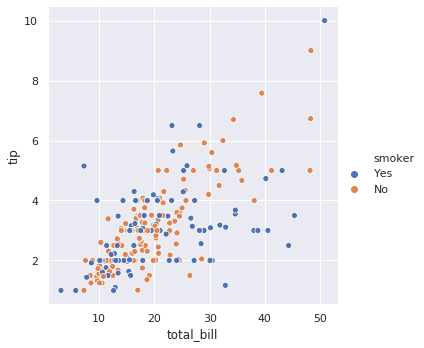

In [2]:
# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
sns.set(style="darkgrid")
g = sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

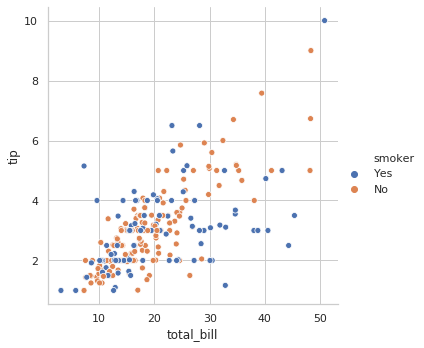

In [3]:
# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
sns.set(style="whitegrid")
g = sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

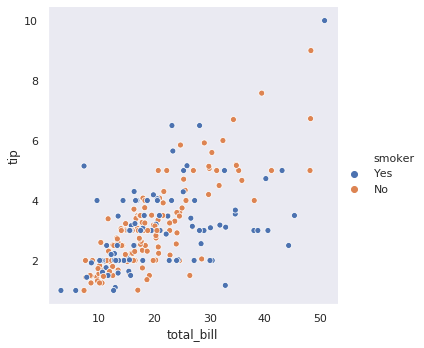

In [4]:
# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
sns.set(style="dark")
g = sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

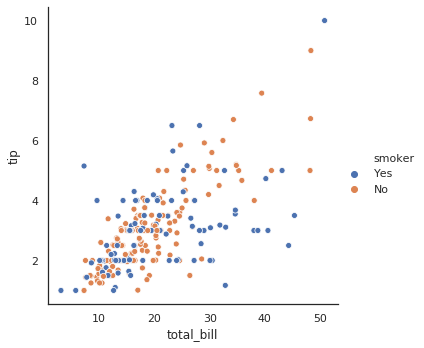

In [5]:
# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
sns.set(style="white")
g = sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

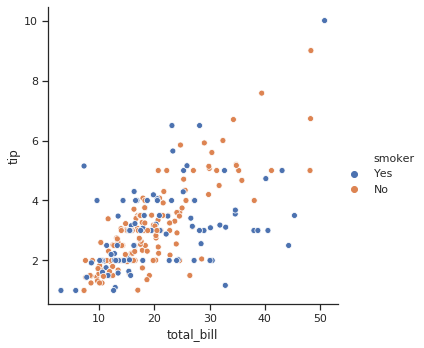

In [6]:
# styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
sns.set(style="ticks")
g = sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)

### Overriding seaborn style to matplotlib

Seaborn 은 matplotlib 을 이용하는 패키지이기 때문에, style 설정이 matplotlib 에도 영향을 줍니다. 아래의 예시는 matplotlib 을 이용하여 주기와 진폭이 서로 다른 sin 함수들의 플랏입니다.

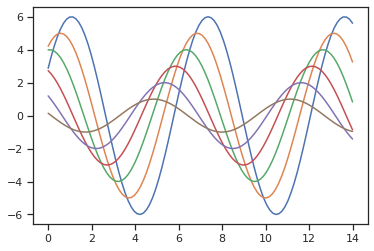

In [7]:
sns.set(style="ticks")

def sinplot(flip=1):
    g = plt.figure(figsize=(6,4))
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
    return g

g = sinplot()

위 그림의 style 을 Seaborn 의 default 인 darkgrid 로 변경해봅니다.

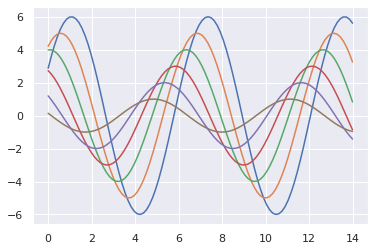

In [8]:
sns.set()
g = sinplot()

혹은 font size 나 line width 와 같은 attributes 를 변경할 수도 있습니다. 가능한 attributes 는 matplotlib 의 문서를 참고합니다.

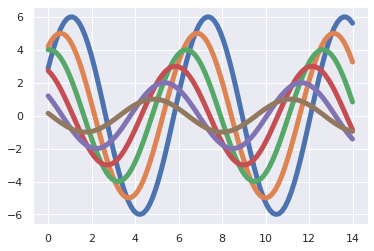

In [9]:
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 5.0})
g = sinplot()

이러한 style 설정의 영향은 matplotlib 을 이용하는 Pandas 에도 미칩니다. DataFrame 의 plot 함수는 기본값으로 matplotlib 을 이용하기 때문에 seaborn 의 style 을 변경하면 설정이 반영됩니다.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


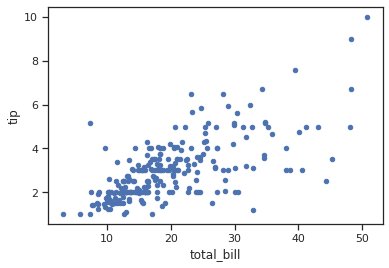

In [10]:
sns.set(style="ticks")
g = tips.plot(x='total_bill', y='tip', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


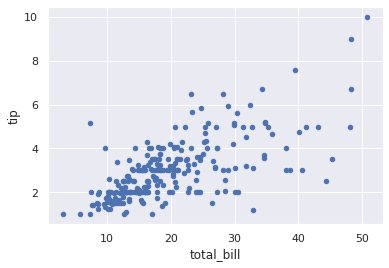

In [11]:
sns.set(style="darkgrid")
g = tips.plot(x='total_bill', y='tip', kind='scatter')

### Customized palette

Palette 는 style 이 이용하는 color codes 입니다. 이들은 RGB 의 값을 [0, 1] 사이로 표현한 tuple 의 list 로 표현됩니다. 현재 이용하는 palette 는 `seaborn.color_palette()` 함수를 통하여 확인할 수 있습니다.

In [12]:
sns.set(style="ticks")
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

Palette 를 사용자의 선호대로 변경할 수 있습니다. 그런데 일반적으로 RGB 값을 위의 예시처럼 float vector 로 알고 있기 보다는 아래처럼, # 뒤에 세 개의 16진수로 RGB 를 표현하는 HTML color code 로 알고 있는 경우들이 많습니다. `seaborn.color_palette()` 함수는 HTML color code 를 float vector 로 변환해 줍니다. 이를 `seaborn.set_palette()` 에 입력하면 palette 가 변경됩니다.

[(0.4980392156862745, 0.788235294117647, 0.4980392156862745),
 (0.7450980392156863, 0.6823529411764706, 0.8313725490196079),
 (0.9921568627450981, 0.7529411764705882, 0.5254901960784314),
 (1.0, 1.0, 0.6),
 (0.2196078431372549, 0.4235294117647059, 0.6901960784313725)]


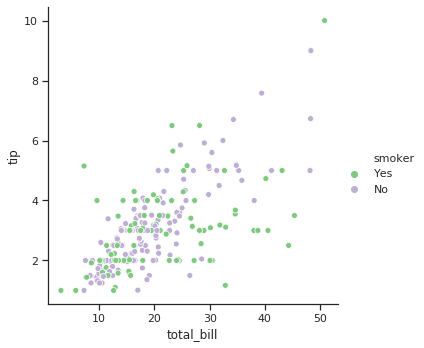

In [13]:
from pprint import pprint

# from Bokeh Accent[5] colors
color_codes = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0']
colors = sns.color_palette(color_codes)
pprint(colors)

sns.set_palette(colors)
g = sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips)